### Data Preparation for Bayesian Filter

install dependencies....

In [50]:
!pip install beautifulsoup4

In [51]:
!pip install wordcloud

In [52]:
#we are importing all the libraries we would like to use.
#including data stores for stopwords and such
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import os
import io
%matplotlib inline

### This function reads the files in the specified path.

In [53]:
def read_files(path):
    #this function is reading the actual email files.
    #the function will cycle through all the files in the folder specified.
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root,filename)
            
            inBody = False
            lines = []
            #this uses IO functions to read the files by specifying the encoding type
            f = io.open(path, 'r', encoding = 'latin1')
            #this cycles through each line and fetches the text therein.
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            #join the text into a single message.
            message = '\n'.join(lines)
            #return the message
            yield path, message
                    

### This function is for creating dataframes from the dataset in question... it also classifies the emails into either ham or spam

In [54]:
#this classifies the emails into spam or ham depending on predetermined status.
def dataFrameFromDirectory(path, classification):
    #instantiate the structure of the dataframe needed.
    rows = []
    index = []
    #store the message alongside its classification.
    for filename, message in read_files(path):
        rows.append({'message': message, 'label': classification})
        index.append(filename)
        #return the dataframe to be used for manipulation
    return pd.DataFrame(rows, index=index)

aggregate all the emails into a single dataframe. The key is: ham = 0, spam = 1

In [55]:
#fetch the data from the source files.
#here you run the datasets sequentially for validation by specifying file name. 

data = pd.DataFrame({'message':[],'label':[]})
data = data.append(dataFrameFromDirectory("datasets/ham3",0))
data = data.append(dataFrameFromDirectory("datasets/spam3",1))
data

,message,label
datasets/ham3/1901.5fb290d69c23e53e5e299ad81af93e8b,use Perl Daily Headline Mailer\n\n\n\nPerlQT 3...,0.0
datasets/ham3/0710.3005b6bc245758d98c9a9626c1de69a7,Ben Hammersley wrote:\n\n\n\n>\n\n> On Thursda...,0.0
datasets/ham3/1593.de7504b4655691f11b3e807e42a2b82c,http://www.hughes-family.org/bugzilla/show_bug...,0.0
datasets/ham3/0253.f8c6edd67ecdabe677a8f5cd082e3fc5,"On Tue, 27 Aug 2002, David Neary wrote:\n\n\n\...",0.0
datasets/ham3/0493.5517cd8d833b17156176a79149073a46,"""Jim Whitehead"" <ejw@cse.ucsc.edu> writes:\n\n...",0.0
...,...,...
datasets/spam3/0366.539843bed9a06ae77966ccbc9dc2e103,"<html><body onload=""window.open('http://202.10...",1.0
datasets/spam3/0245.39c15852204971c72e8d89f9f3f9bb38,NIGERIA ELECTIRC POWER AUTHORITY \n\nFEDERAL S...,1.0
datasets/spam3/0362.d605ea00a259c1245d6e21ecf38264cf,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 3.2//E...",1.0
datasets/spam3/0014.ed99ffe0f452b91be11684cbfe8d349c,<HTML><HEAD><TITLE>FREE Motorola Cell Phone wi...,1.0


The below cell shows the number of rows in our dataframe.

In [56]:
total_mails = data['message'].shape[0]
total_mails

600

The function below extracts all text from html text present in all emails.

In [57]:
#this is for scraping the emails, since most are in the form of html based content.
from bs4 import BeautifulSoup

def func(df):
    soup = BeautifulSoup(df['message'], "html.parser").find()
    #check emails with html syntax
    if bool(soup):
        soup = BeautifulSoup(df['message'], "html.parser")
        #extract text only from the whole email.
    
        text = soup.find_all(text=True)
      
        #return all the words found.
        text = ''.join(word for word in  text)
        df['message'] = text
        
        return text
    else:
        
        return df['message'] 

In [58]:
import email

def using_emailing_function(df):

#     msg = email.message_from_string(df['message'])
#     for part in msg.walk():
#         print(df['message'])
        
    msg = email.message_from_string(df['message'])
    if msg.is_multipart():
        for payload in msg.get_payload():
            # if payload.is_multipart(): ...
#             print(payload.get_payload())
            soup = BeautifulSoup(payload.get_payload(), "lxml").find()
            if bool(soup):
                print(payload.get_payload())
            else:
                print(payload.get_payload())
    else:
        soup = BeautifulSoup(msg.get_payload(), "lxml").find()
        if bool(soup):
                print(msg.get_payload())
#         else:
#             print(msg.get_payload())



In [59]:
new_data = data.reset_index()
new_data

,index,message,label
0,datasets/ham3/1901.5fb290d69c23e53e5e299ad81af...,use Perl Daily Headline Mailer\n\n\n\nPerlQT 3...,0.0
1,datasets/ham3/0710.3005b6bc245758d98c9a9626c1d...,Ben Hammersley wrote:\n\n\n\n>\n\n> On Thursda...,0.0
2,datasets/ham3/1593.de7504b4655691f11b3e807e42a...,http://www.hughes-family.org/bugzilla/show_bug...,0.0
3,datasets/ham3/0253.f8c6edd67ecdabe677a8f5cd082...,"On Tue, 27 Aug 2002, David Neary wrote:\n\n\n\...",0.0
4,datasets/ham3/0493.5517cd8d833b17156176a791490...,"""Jim Whitehead"" <ejw@cse.ucsc.edu> writes:\n\n...",0.0
...,...,...,...
595,datasets/spam3/0366.539843bed9a06ae77966ccbc9d...,"<html><body onload=""window.open('http://202.10...",1.0
596,datasets/spam3/0245.39c15852204971c72e8d89f9f3...,NIGERIA ELECTIRC POWER AUTHORITY \n\nFEDERAL S...,1.0
597,datasets/spam3/0362.d605ea00a259c1245d6e21ecf3...,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 3.2//E...",1.0
598,datasets/spam3/0014.ed99ffe0f452b91be11684cbfe...,<HTML><HEAD><TITLE>FREE Motorola Cell Phone wi...,1.0


In [60]:
#this removes all text that is not alphanumeric i.e special characters.
new_data[new_data['message'].str.isalnum()]

,index,message,label


split the data into the pareto principle for unbiased model testing.
so 80% will be used for training and 20% for testing.
this will be accomplished by using a random number generator to randomize the order by implementing a uniform distribution randomizer. this removes all chances of having a biased model on account of sequential data.

In [61]:
#split the data into training and testing sets
#initializing empty lists to hold training and testing data respectively
train_index, test_index = list(), list()
for i in range(data['message'].shape[0]):
    #make use of the uniform random distribution to alleviate contiguousness of pseudo-random number generators.
    #80% for training and 20% for testing according to the pareto principle.
    if np.random.uniform(0,1) < 0.80:
        train_index.append(i)
    else:
        test_index.append(i)
#training data dataframe.
train_data = new_data.loc[train_index]
#test data dataframe
test_data = new_data.loc[test_index]

In [62]:
train_data.apply(using_emailing_function, axis = 1) 

Ben Hammersley wrote:



>

> On Thursday, Sep 19, 2002, at 14:51 Europe/London, Bill Kearney wrote:

>

>>> From the completely unrelated but funny department...

>>

>>

>> "Talk like a Pirate Day".

>> http://www.washingtonpost.com/wp-dyn/articles/A5011-2002Sep11.html

>>

>> Which is today, of course.

>>

>> That and 'piratecore' rapping style...

>> http://poorman.blogspot.com/2002_09_01_poorman_archive.html#81798893

>>

>> Anything, just anything, to get us off the geek dating tips topic....

>>

>> -Bill Kearney

>>

>

>

> Arrr, he be a scurvy dog, that Bill Kearney.



Well, shiver me timbers, but my favorite pirate phrase is missing from 

both of those.Arrr....

and wondering if there's a rap equivalent.

Owen



http://www.quinion.com/words/qa/qa-shi2.htm

*Q AND A SECTION*



*SHIVER MY TIMBERS*



/From Tad Spencer/: "Please could you tell me where the phrase /shiver 

my timbers/ originated?"



This is one of those supposedly nautical expressions that seem to be 

be

Congrats, in the end...

> "If they didn't have Max, they might have succumbed, because PayPal was 

> susceptible to fraud and money laundering, and Max tightened them up,"



http://www.infoworld.com/articles/ct/xml/02/09/02/020902ctspotlight.xml



Secure and at ease

By Jack Mccarthy

August 30, 2002 1:01 pm PT



MAX LEVCHIN'S FASCINATION with encryption started when he was a teenager 

in Kiev, Ukraine, and continued as he immigrated to the United States 

where he attended the University of Illinois at Urbana-Champaign. In 

late 1998, not two years out of college, he drew on his passion to 

co-found PayPal, the online payment system that has since attracted tens 

of millions of users and gained the reputation as the premier Internet 

transaction processor. Now online auction house eBay has acquired his 

company for a king's ransom.



Not bad for a 27-year-old kid from Ukraine.



A programmer since he was 10 years old, Levchin and his family moved to 

Chicago in 1991, and

<html>

<head>

<meta http-equiv="content-type" content="text/html; charset=euc-kr">

<title>¿äÁò ¶ß´Â Á÷Á¾ Best 5 : ±ÝÀ¶ / IT / ¹æ¼Û / ºäÆ¼ / ÀÎÅ×¸®¾î</title>

<meta name="generator" content="Namo WebEditor v5.0">

</head>

<BODY text=black vLink=purple aLink=red link=blue bgColor=white>

<TABLE cellSpacing=0 cellPadding=0 width=672 border=0>

<TBODY>

<TR>

<TD width=7 bgColor=#ffffff><IMG height=1

src="http://image.hanmail.net/hanmail/general/trans.gif" width=7><BR></TD>

<TD vAlign=top width="99%" bgColor=#ffffff><IMG height=105

src="http://image.hanmail.net/hanmail/s_img/recruit/sp_top01.gif"

width=221><IMG height=105

src="http://image.hanmail.net/hanmail/s_img/recruit/sp_top02.gif"

width=442>

<TABLE cellSpacing=0 cellPadding=0 width="100%" border=0>

<TBODY>

<TR>

<TD width=5><IMG height=8

src="http://image.hanmail.net/hanmail/s_img/recruit/g_raound01.gif"

width=5><BR></TD>

<TD width="97%" bgColor=#cbd940></TD>

<TD width=13><IMG height=8

src="http://image.hanmail.net/

1      None
2      None
3      None
6      None
8      None
       ... 
594    None
595    None
596    None
597    None
599    None
Length: 469, dtype: object

implement the data cleaning of the html based messages
    

In [63]:
#here we  apply the scraping function to our data. hence cleaning it.
train_data['message'] = train_data.apply(func, axis=1)
test_data['message'] = test_data.apply(func, axis=1)
train_data #its just expecting the data to come from a website and not a dataframe.

,index,message,label
1,datasets/ham3/0710.3005b6bc245758d98c9a9626c1d...,Ben Hammersley wrote:\n\n\n\n>\n\n> On Thursda...,0.0
2,datasets/ham3/1593.de7504b4655691f11b3e807e42a...,http://www.hughes-family.org/bugzilla/show_bug...,0.0
3,datasets/ham3/0253.f8c6edd67ecdabe677a8f5cd082...,"On Tue, 27 Aug 2002, David Neary wrote:\n\n\n\...",0.0
6,datasets/ham3/2117.d0ce36a8b096fff94266db762fe...,"URL: http://www.newsisfree.com/click/-4,826354...",0.0
8,datasets/ham3/1926.015beeecce2dc9c81309671f1f4...,\n\nForwarded-by: Nev Dull \n\nForwarded-by: G...,0.0
...,...,...,...
594,datasets/spam3/0471.f3cd3e181577b34e474bea8c48...,Hi -\n\n\n\n( http://club.4tfox.com )\n\n\n\nY...,1.0
595,datasets/spam3/0366.539843bed9a06ae77966ccbc9d...,"\nzzzz Hello, jm@example.comHu man Growth Horm...",1.0
596,datasets/spam3/0245.39c15852204971c72e8d89f9f3...,NIGERIA ELECTIRC POWER AUTHORITY \n\nFEDERAL S...,1.0
597,datasets/spam3/0362.d605ea00a259c1245d6e21ecf3...,"HTML PUBLIC ""-//W3C//DTD HTML 3.2//EN""\n\n\n\n...",1.0


In [64]:
import re #regular expression. it is used to perform word searches.

train_data['message'] = train_data['message'].map(lambda x: re.sub(r'\W+', ' ', x))
test_data['message'] = test_data['message'].map(lambda x: re.sub(r'\W+', ' ', x))

In [65]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [66]:
train_data['message'].str.isalnum()

0      False
1      False
2      False
3      False
4      False
       ...  
464    False
465    False
466    False
467    False
468    False
Name: message, Length: 469, dtype: bool

In [67]:
test_data

,index,message,label
0,datasets/ham3/1901.5fb290d69c23e53e5e299ad81af...,use Perl Daily Headline Mailer PerlQT 3 Releas...,0.0
1,datasets/ham3/0493.5517cd8d833b17156176a791490...,Jim Whitehead writes The CD player we have co...,0.0
2,datasets/ham3/1424.99bed488956252e02c4ec7ff578...,On Tue 27 Aug 2002 the voices made Matt Sergea...,0.0
3,datasets/ham3/0635.9df0cec793507fcd3cab877c7d7...,0 1051763016 1031874793 3397 Content Type tex...,0.0
4,datasets/ham3/1532.7629e5bf068e857d0149f49caf3...,I m getting an error page from sourceforge net...,0.0
...,...,...,...
126,datasets/spam3/0377.31267c80e042b22be0436c044c...,This is a multi part message in MIME format _N...,1.0
127,datasets/spam3/0016.f9c349935955e1ccc7626270da...,Lowest Rate Services Conferencing Made Easy On...,1.0
128,datasets/spam3/0428.8fc153d0c9cbc406fbd9bdf1c4...,Home Page If this promotion has reached you i...,1.0
129,datasets/spam3/0408.87f7a3c9c29aaf97b413126029...,ÄúºÃ º Èç¹û ËÐÅ òÈÅµ½Äú ÎÒÃÇÉî Ð Ç Çë½ ËÐÅÉ¾³ý...,1.0


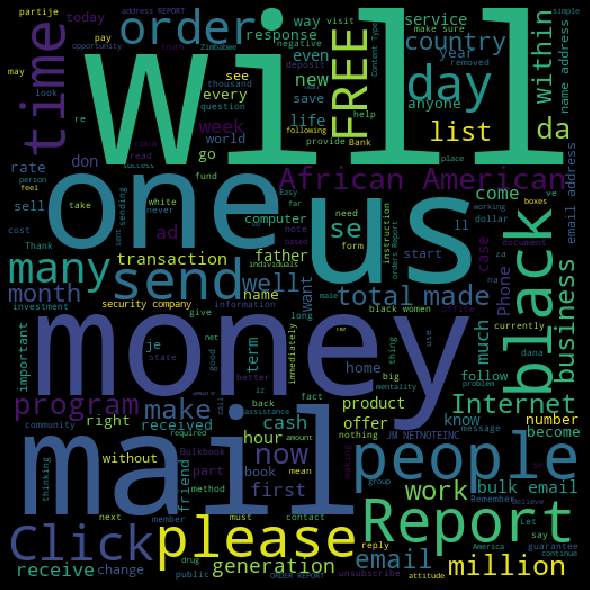

In [68]:
#visual representation of the most salient words.
#this is the visulization for the spam.
spam_words = ' '.join(str(moja) for moja in list(test_data[test_data['label'] == 1]['message']))
spamwc = WordCloud(width = 512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spamwc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

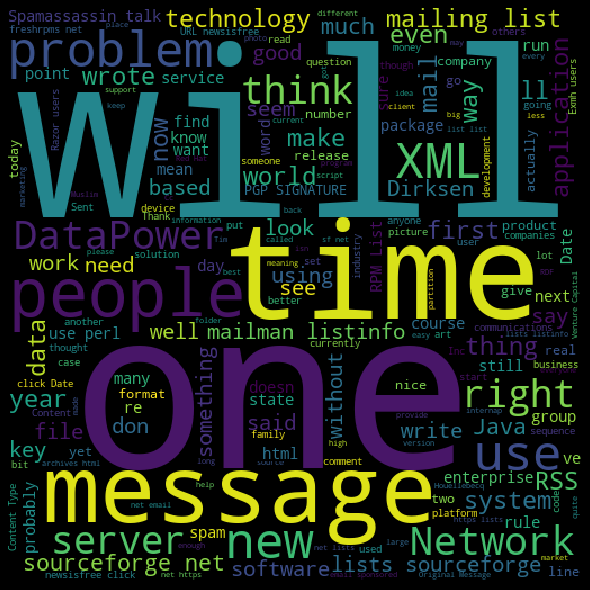

In [69]:
#Visualize the ham data
spam_words = ' '.join(str(moja) for moja in list(test_data[test_data['label'] == 0]['message']))
spamwc = WordCloud(width = 512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spamwc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

distribution by value

In [70]:
train_data['label'].value_counts() #remove the paragraph line

0.0    390
1.0     79
Name: label, dtype: int64

In [71]:
#tokenizing and processing the words harnessed.
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    #lower case all the letters in the message.
    if lower_case:
        message = message.lower()
    #break down the words into tokens.
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
#     print(words)
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        #fetch all words that do not have meaning in this case: stopwords.
        sw = stopwords.words('english')
        #create a list of words containing only the words without stopwords
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
#     print(words)
    return words

In [72]:
train_data.columns

Index(['index', 'message', 'label'], dtype='object')

In [73]:
#this whole function is the bayesian classifier. the calc_prob calculates the probability of a word bein either spam or ham.
#the classify function returns true if the threshold for it being spam has been reached. otherwise, it is false, meaning ham.
class SpamClassifier(object):
    def __init__(self, train_data, method = 'tf-idf'):
        #initialize the data to be used for processing. i.e training data.
        self.mails, self.labels = train_data['message'], train_data['label']
        self.method = method

    def train(self):
        #this function trains our model.
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        # initialize variables to calculate probabilities. i.e probability of being ham or spam. using normal probabilistic theory.
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            #if word is spam create a dictionary with the key being the word and the value being the probability of it being spam.
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            #if word is ham, create a dictionary with the key being the ham word and the value being its probability of being ham.
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        self.missing_index = [number for number in range(0,noOfMessages) if number not in self.mails.index ]
        for i in range(noOfMessages):
            if i not in self.missing_index:
                message_processed = process_message(self.mails[i])
                count = list() #To keep track of whether the word has ocured in the message or not.
                               #For IDF
                for word in message_processed:
                    if self.labels[i]:
                        self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                        self.spam_words += 1
                    else:
                        self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                        self.ham_words += 1
                    if word not in count:
                        count += [word]
                for word in count:
                    if self.labels[i]:
                        self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                    else:
                        self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
       #the method that does the actual classifying.             
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                try:
                    if self.method == 'tf-idf':
                        pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                    else:
                        pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
                except:
                    print('oops')
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                try:
                    if self.method == 'tf-idf':
                        pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                    else:
                        pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
                except:
                    print('oops')
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
            #if probability of spam is higher, it returns true.
            return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
        
            result[i] = int(self.classify(processed_message))
        return result

In [74]:
def metrics(labels, predictions): #Confusion matrix function
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [76]:
sc_bow = SpamClassifier(train_data, 'bow') 
sc_bow.train()
preds_bow = sc_bow.predict(test_data['message'])
metrics(test_data['label'], preds_bow)

Precision:  0.6
Recall:  0.2857142857142857
F-score:  0.3870967741935483
Accuracy:  0.8549618320610687


In [77]:
sc_tf_idf = SpamClassifier(train_data, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(test_data['message'])
metrics(test_data['label'], preds_tf_idf) 

Precision:  0.6
Recall:  0.2857142857142857
F-score:  0.3870967741935483
Accuracy:  0.8549618320610687


In [78]:
pm = process_message('I cant pick the phone right now. Pls send a message')
sc_tf_idf.classify(pm)

False

In [79]:
pm = process_message(test_data[test_data['label'] == 1].iloc[5]['message'])
sc_tf_idf.classify(pm) 

True

In [80]:
test_data[test_data['label'] == 1].iloc[3]['message']

'This is a multi part message in MIME format _NextPart_vXklypZzzDWWhOFZ5e1rZ Content Type multipart alternative boundary _NextPart_vXklypZzzDWWhOFZ5e1rZAA _NextPart_vXklypZzzDWWhOFZ5e1rZAA Content Type text html charset big5 Content Transfer Encoding base64 PGh0bWw DQoNCjxoZWFkPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1MYW5ndWFnZSIgY29u dGVudD0iemgtdHciPg0KPG1ldGEgbmFtZT0iR0VORVJBVE9SIiBjb250ZW50PSJNaWNyb3NvZnQg RnJvbnRQYWdlIDUuMCI DQo8bWV0YSBuYW1lPSJQcm9nSWQiIGNvbnRlbnQ9IkZyb250UGFnZS5F ZGl0b3IuRG9jdW1lbnQiPg0KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50 PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9YmlnNSI DQo8dGl0bGU s2 sT6llsFWl0bFNt368c6dppL2l caVOtW kxaq9sbWmXqtItUyqa7G1pqwgy c8L3RpdGxlPg0KPC9oZWFkPg0KDQo8Ym9keT4NCg0K PHAgc3R5bGU9Im1hcmdpbi10b3A6IDBweDsgbWFyZ2luLWJvdHRvbTogMHB4Ij48Zm9udCBjb2xv cj0iIzgwODA4MCI DQqzb6xPqWWwVaXRsU23frxzp2mkvaVxpU61b6TFqr2xtaZeq0i1TKprsbWm rCDL5yB ICE8L2ZvbnQ PC9wPg0KPGhyIFNJWkU9IjEiPg0KPGRpdiBhbGlnbj0iY2VudGVyIj4N CiAgPGNlbnRlcj4NCiAgPHRhYmxlIHN0eWxlPSJib3JkZXI6I

In [ ]:
-